In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fayl yo‘li
file_path = r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\4-oy\6-project\binance.com\data\multi-class_JUP_data\multi_class_JUP_features.csv"

# Ma’lumotni o‘qish
df = pd.read_csv(file_path, index_col="Datetime", parse_dates=True)

print("Data shape:", df.shape)
df.head()


Data shape: (8999, 7)


,JUP_Open,JUP_High,JUP_Low,JUP_Close,JUP_Volume,JUP_Future_Return,JUP_Target_MultiClass
Datetime,,,,,,,
2024-10-22 22:00:00,0.9858,0.9989,0.9841,0.9951,1157569.4,-0.002211,1
2024-10-22 23:00:00,0.9951,0.9996,0.9855,0.9929,1230196.9,-0.011985,0
2024-10-23 00:00:00,0.9931,0.9999,0.9795,0.9810,1826052.9,0.018247,2
2024-10-23 01:00:00,0.9811,0.9990,0.9789,0.9989,1324239.0,-0.010912,0
2024-10-23 02:00:00,0.9988,0.9998,0.9869,0.9880,1191054.4,-0.011134,0


In [2]:
df.info()
print("\nMissing values per column:\n", df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8999 entries, 2024-10-22 22:00:00 to 2025-11-01 20:00:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   JUP_Open               8999 non-null   float64
 1   JUP_High               8999 non-null   float64
 2   JUP_Low                8999 non-null   float64
 3   JUP_Close              8999 non-null   float64
 4   JUP_Volume             8999 non-null   float64
 5   JUP_Future_Return      8999 non-null   float64
 6   JUP_Target_MultiClass  8999 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 562.4 KB

Missing values per column:
 JUP_Open                 0
JUP_High                 0
JUP_Low                  0
JUP_Close                0
JUP_Volume               0
JUP_Future_Return        0
JUP_Target_MultiClass    0
dtype: int64


C:\Users\sharg\AppData\Local\Temp\ipykernel_2416\620700869.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JUP_Target_MultiClass', data=df, palette='coolwarm')


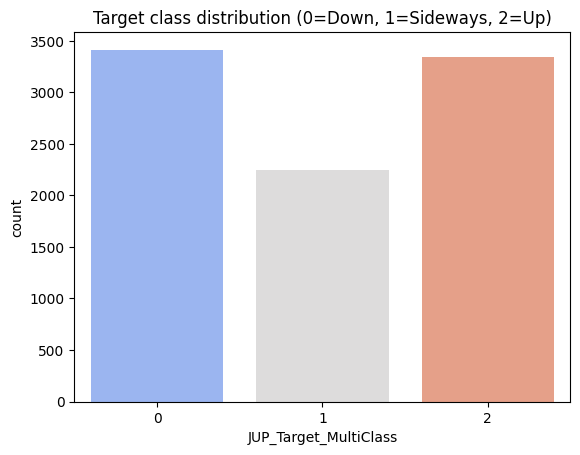

JUP_Target_MultiClass
0    0.379375
2    0.371152
1    0.249472
Name: proportion, dtype: float64

In [3]:
sns.countplot(x='JUP_Target_MultiClass', data=df, palette='coolwarm')
plt.title("Target class distribution (0=Down, 1=Sideways, 2=Up)")
plt.show()

df['JUP_Target_MultiClass'].value_counts(normalize=True)


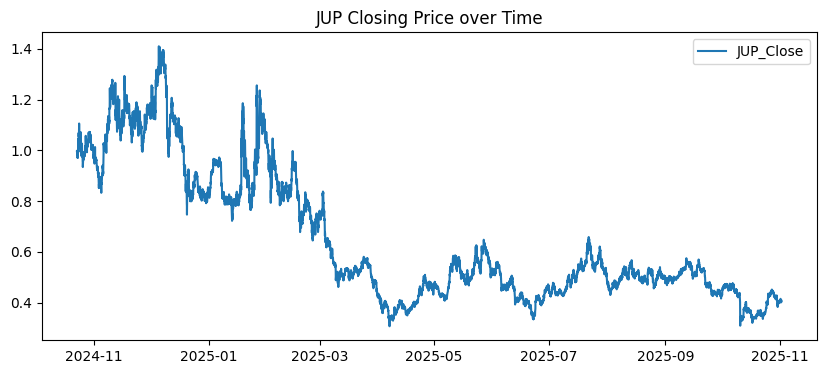

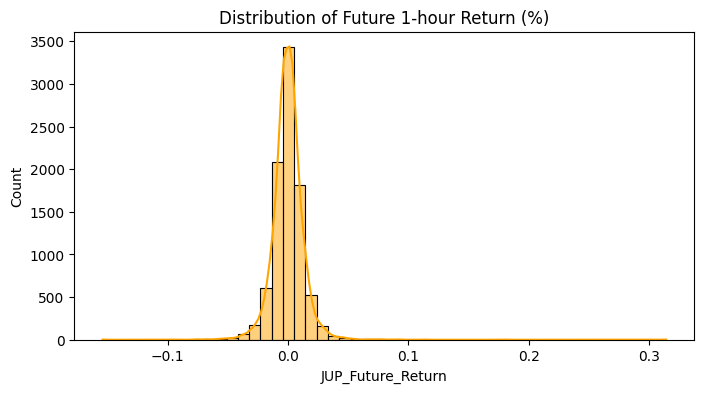

In [4]:
plt.figure(figsize=(10,4))
plt.plot(df['JUP_Close'], label='JUP_Close')
plt.title("JUP Closing Price over Time")
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['JUP_Future_Return'], bins=50, kde=True, color='orange')
plt.title("Distribution of Future 1-hour Return (%)")
plt.show()


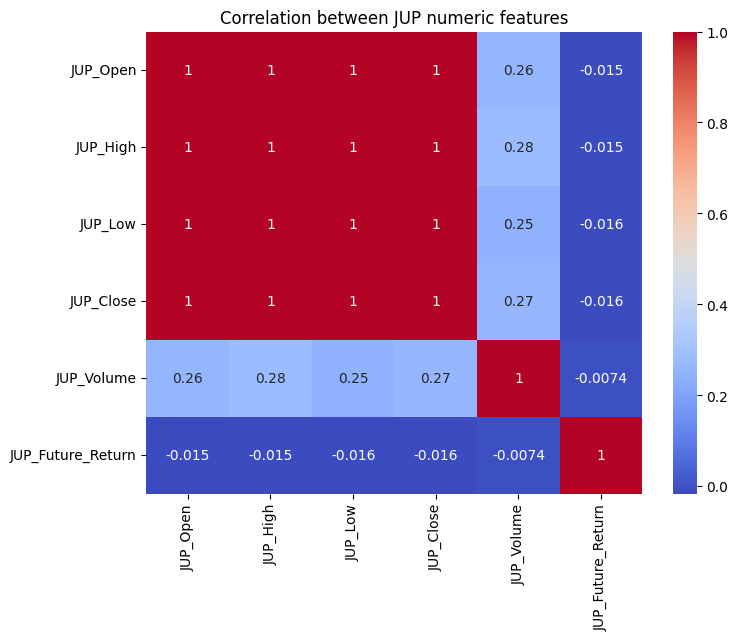

In [5]:
numeric_cols = [col for col in df.columns if 'JUP_' in col and col not in ['JUP_Target_MultiClass']]
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between JUP numeric features")
plt.show()


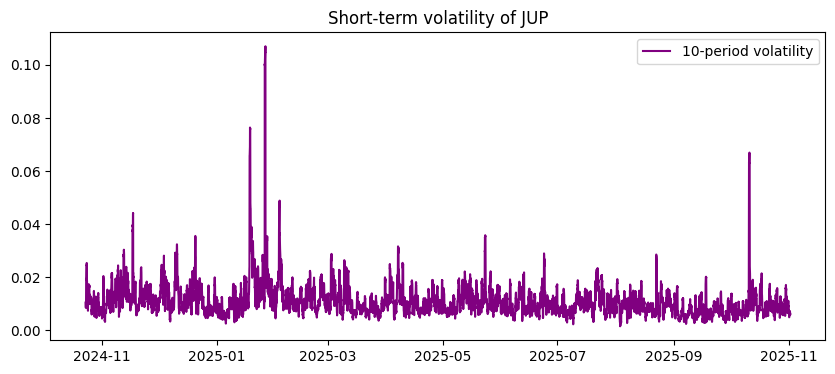

,JUP_Return,JUP_Volatility
count,8998.000000,8989.000000
mean,-0.000015,0.011273
std,0.013045,0.006690
min,-0.154078,0.001467
25%,-0.006412,0.007451
50%,0.000000,0.009903
75%,0.006265,0.013366
max,0.314323,0.107030


In [6]:
df['JUP_Return'] = df['JUP_Close'].pct_change()
df['JUP_Volatility'] = df['JUP_Return'].rolling(window=10).std()

plt.figure(figsize=(10,4))
plt.plot(df['JUP_Volatility'], label='10-period volatility', color='purple')
plt.title("Short-term volatility of JUP")
plt.legend()
plt.show()

df[['JUP_Return', 'JUP_Volatility']].describe()
